In [1]:
import fcsparser
#Importing Libraries

import fcsparser as fcsp
import re
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid, train_test_split, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA


import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing data

def load_data(dir):
    print('---- loading data ---->')
    data = {}
    for dirname, _, filename in os.walk(dir):
        for file in filename:
            path = os.path.join(dirname, file)
            # Slicing in order to remove .fcs from filename
            f_name = ''.join(list(file)[:-4])
            data[f_name] = pd.DataFrame(fcsp.parse(path, meta_data_only=False, reformat_meta=True)[1])
    return data, fcsp.parse(path, meta_data_only=False, reformat_meta=True)[0]['_channels_']
 

'''
for dirname, _, filename in os.walk(HERE):
    for file in filename:
      path = os.path.join()
        meta = fcsparser.parse(, meta_data_only=True, reformat_meta=True)
'''

def prepData(x,scaler=None):
        """
        Normalize data
        """
        if not scaler:
                scaler = StandardScaler().fit(x)
        x_transformed= np.nan_to_num(np.array(scaler.transform(x)))
        return normalize(x_transformed),scaler

# Loading fcs file data into a dictionary
global path

dir = os.path.abspath(os.path.dirname('C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik - Copy\\Tetracycline'))
dir = os.path.join(dir, 'C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik - Copy\\Tetracycline')
data, channels = load_data(dir)

# Function to return list of different taken samples
def sample_list(det = data):
    return set([sample[0:3] for sample in det.keys()])


# Function to check the dimensions of our fcs files
def checkDimensions(data, dimensions):
    for sample in data:
        if data[sample].shape != dimensions: print(sample, data[sample].shape)
    return 



---- loading data ---->


In [3]:
data

{'THD1_1':             FSC-A  FSC-H        SSC-A      FITC-A        PE-A   PE-Cy5-A  \
 0      448.000000  746.0   801.900024  136.619995 -456.390015 -42.570000   
 1       48.000000  828.0   656.369995  -60.389999 -278.190002  38.610001   
 2       57.600002  845.0   939.510010  -67.320000 -522.720032 -17.820000   
 3      579.200012  790.0   858.330017  122.760002  156.419998 -71.279999   
 4      507.200012  738.0  1168.199951   65.340004  447.480011   1.980000   
 ...           ...    ...          ...         ...         ...        ...   
 99995  144.800003  709.0   829.619995 -130.680008   58.410000 -60.389999   
 99996  148.800003  722.0   653.400024  -46.529999 -284.130005 -53.459999   
 99997  359.200012  895.0   611.820007  -44.549999  335.610016 -31.680000   
 99998  232.800003  742.0   379.170013   80.190002 -276.209991 -28.710001   
 99999  426.399994  743.0   643.500000  -36.630001 -213.839996  54.450001   
 
         PE-Cy7-A       APC-A   APC-Cy7-A  Pacific Blue-A    AmC

In [4]:
checkDimensions(data,data[random.choice(list(data.keys()))].shape)

TMD4_2 (100094, 12)


In [5]:
#concatenating the dataframes of all triplicates -->
def triplicates_combined(data = data):
    deta = {}
    for key in data.keys():
        deta[key[:4]]= pd.concat([data[key[:4]+'_1'],data[key[:4]+'_2'],data[key[:4]+'_3']],axis=0)
    return deta

triplicates_combined()

{'THD1':              FSC-A   FSC-H        SSC-A      FITC-A        PE-A   PE-Cy5-A  \
 0       448.000000   746.0   801.900024  136.619995 -456.390015 -42.570000   
 1        48.000000   828.0   656.369995  -60.389999 -278.190002  38.610001   
 2        57.600002   845.0   939.510010  -67.320000 -522.720032 -17.820000   
 3       579.200012   790.0   858.330017  122.760002  156.419998 -71.279999   
 4       507.200012   738.0  1168.199951   65.340004  447.480011   1.980000   
 ...            ...     ...          ...         ...         ...        ...   
 99995  2134.400146  2382.0  1028.609985  249.479996 -112.860001  47.520000   
 99996   848.000000  1010.0  3231.360107  160.380005  213.839996   9.900000   
 99997   152.000000   739.0   562.320007 -105.930000 -400.950012  89.099998   
 99998   308.000000   714.0  1013.760010   60.389999 -497.970001  71.279999   
 99999   733.600037   861.0   476.190002 -127.709999 -411.839996  11.880000   
 
          PE-Cy7-A       APC-A   APC-Cy7-A

In [8]:
channels

,$PnN,$PnR,$PnB,$PnE,$PnV,$PnG
Channel Number,,,,,,
1,FSC-A,262144,32,"[0, 0]",478,1.0
2,FSC-H,262144,32,"[0, 0]",478,1.0
3,SSC-A,262144,32,"[0, 0]",324,1.0
4,FITC-A,262144,32,"[0, 0]",610,1.0
5,PE-A,262144,32,"[0, 0]",637,1.0
6,PE-Cy5-A,262144,32,"[0, 0]",606,1.0
7,PE-Cy7-A,262144,32,"[0, 0]",775,1.0
8,APC-A,262144,32,"[0, 0]",833,1.0
9,APC-Cy7-A,262144,32,"[0, 0]",715,1.0


In [9]:
data.keys()

dict_keys(['THD1_1', 'THD1_2', 'THD1_3', 'THD2_1', 'THD2_2', 'THD2_3', 'THD3_1', 'THD3_2', 'THD3_3', 'THD4_1', 'THD4_2', 'THD4_3', 'THD5_1', 'THD5_2', 'THD5_3', 'TLD1_1', 'TLD1_2', 'TLD1_3', 'TLD2_1', 'TLD2_2', 'TLD2_3', 'TLD3_1', 'TLD3_2', 'TLD3_3', 'TLD4_1', 'TLD4_2', 'TLD4_3', 'TLD5_1', 'TLD5_2', 'TLD5_3', 'TMD1_1', 'TMD1_2', 'TMD1_3', 'TMD2_1', 'TMD2_2', 'TMD2_3', 'TMD3_1', 'TMD3_2', 'TMD3_3', 'TMD4_1', 'TMD4_2', 'TMD4_3', 'TMD5_1', 'TMD5_2', 'TMD5_3'])

In [10]:
Day_1 = dict([(key,data[key]) for key in data.keys() if key.endswith('_1')])
Day_1.keys()

dict_keys(['THD1_1', 'THD2_1', 'THD3_1', 'THD4_1', 'THD5_1', 'TLD1_1', 'TLD2_1', 'TLD3_1', 'TLD4_1', 'TLD5_1', 'TMD1_1', 'TMD2_1', 'TMD3_1', 'TMD4_1', 'TMD5_1'])

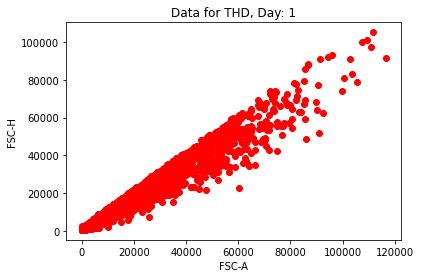

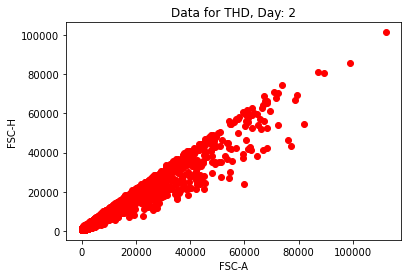

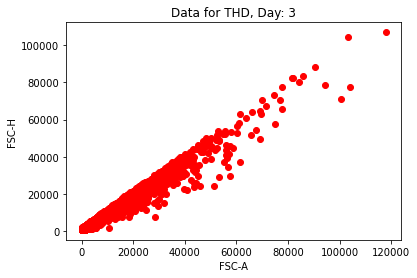

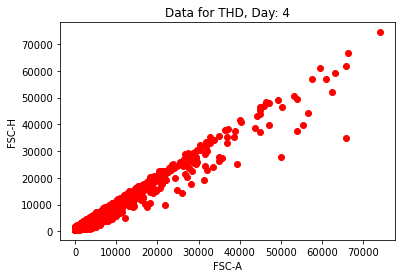

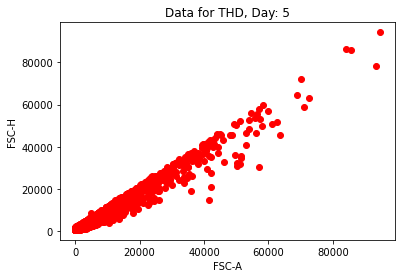

[None, None, None, None, None]

In [16]:
def plot_sample_data(data, key, day = 1):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.title(f'Data for {key}, Day: {day}')
    plt.show()
    

[plot_sample_data(data, 'THD',i) for i in range(1,6)]

(1500000, 12)


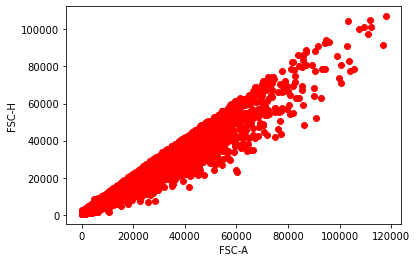

In [17]:
# function to plot combined data of all days(1-5) for a particular sample

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(1,6):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.show()

plot_sample(data,'THD')

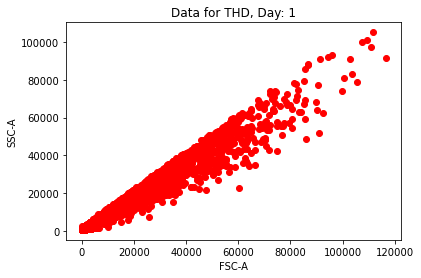

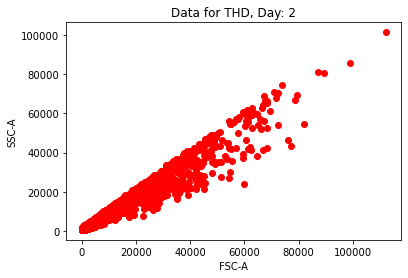

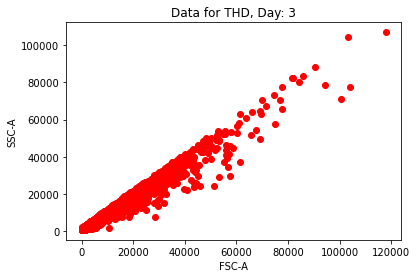

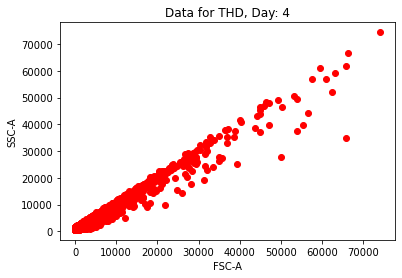

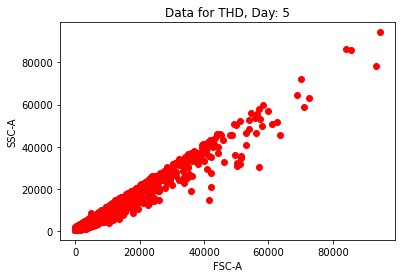

[None, None, None, None, None]

In [18]:
def plot_sample_data(data, key, day = 1):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('SSC-A')
    plt.title(f'Data for {key}, Day: {day}')
    plt.show()
    

[plot_sample_data(data, 'THD',i) for i in range(1,6)]

Cluster 1 Inertia 4328662761472.0
Cluster 2 Inertia 2766066679808.0
Cluster 3 Inertia 1371364261888.0
Cluster 4 Inertia 970599890944.0
Cluster 5 Inertia 767915589632.0
Cluster 6 Inertia 629609070592.0
Cluster 7 Inertia 546424979456.0
Cluster 8 Inertia 466062770176.0
Cluster 9 Inertia 422672367616.0
Cluster 10 Inertia 386033057792.0
Cluster 11 Inertia 358882574336.0
Cluster 12 Inertia 332081463296.0
Cluster 13 Inertia 309294825472.0
Cluster 14 Inertia 289677410304.0
Cluster 15 Inertia 275683377152.0
Cluster 16 Inertia 260573593600.0
Cluster 17 Inertia 246298001408.0
Cluster 18 Inertia 234494476288.0
Cluster 19 Inertia 223851937792.0


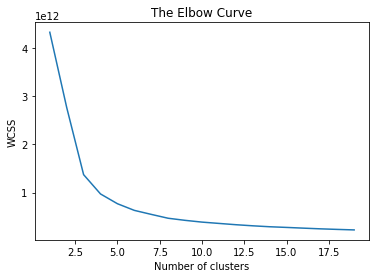

In [27]:
def elbow_curve(sample = sample):
    wcss = []
    for i in range(1,20):
      kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
      kmeans.fit(sample)
      wcss.append(kmeans.inertia_)
      print('Cluster', i, 'Inertia', kmeans.inertia_,)
    plt.plot(range(1,20),wcss)
 
    plt.title('The Elbow Curve')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
    plt.show()

elbow_curve()

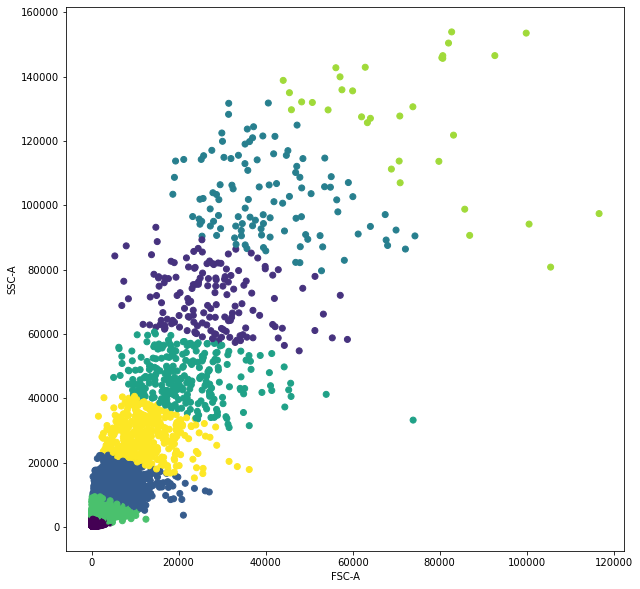

In [20]:
# Running Clustering with feature vector of size 3 in place of 3000 feature vector

num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['SSC-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("SSC-A")

plt.show()


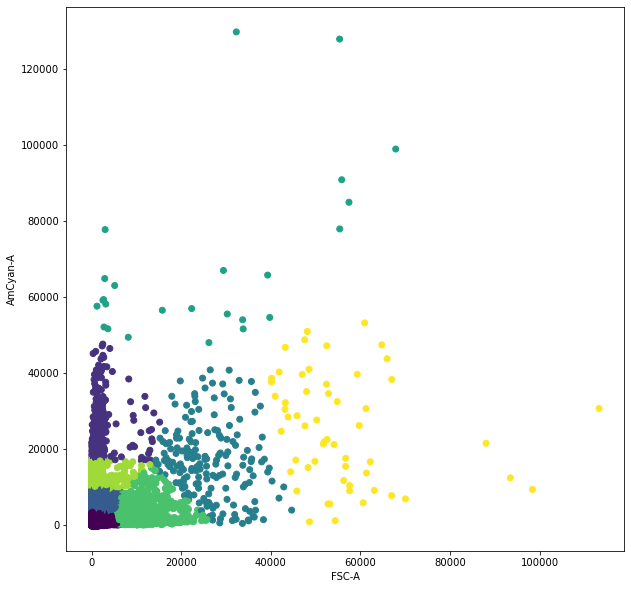

In [21]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("AmCyan-A")
plt.show()

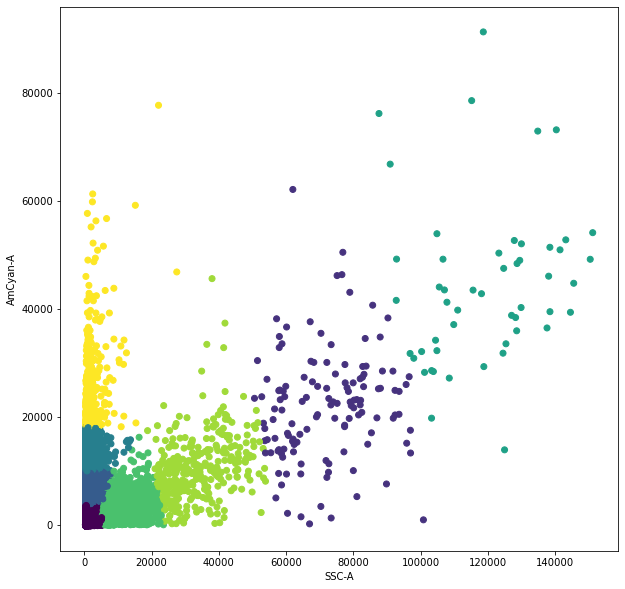

In [22]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("SSC-A")
plt.ylabel("AmCyan-A")
plt.show()

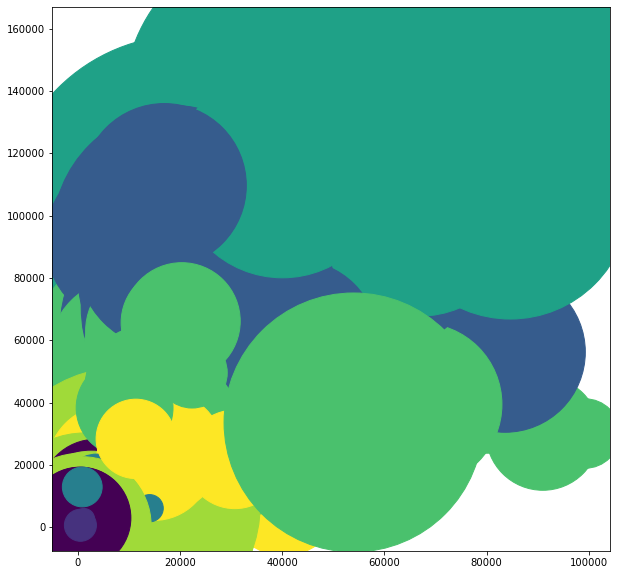

In [23]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 

plt.show()

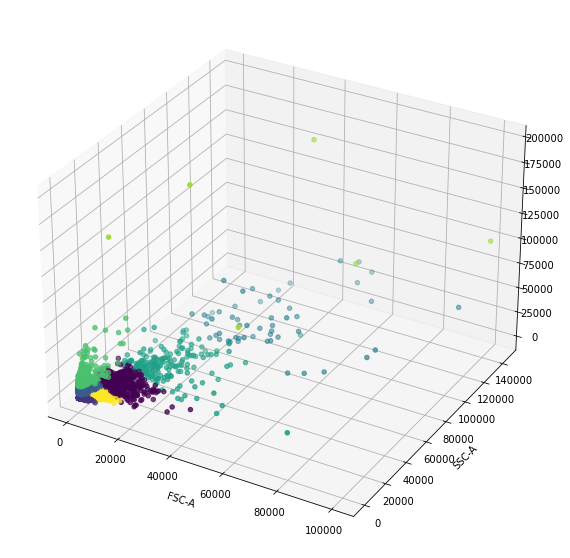

In [24]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d' )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A", )
plt.ylabel("SSC-A",)

plt.show()

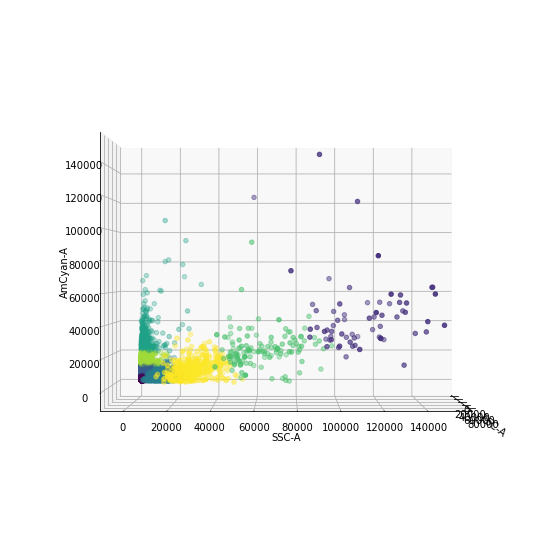

In [25]:
from mpl_toolkits import mplot3d
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d' )
ax.view_init(0,0 )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A", )
plt.ylabel("SSC-A",)
ax.set_zlabel('AmCyan-A')


plt.show()